## EDA with sales and store data

In this notebook, we combine sales data with store-specific data and carry out exploratory analyses.

##### Import the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_palette("Set2")
warnings.filterwarnings("ignore")
%matplotlib inline

##### Read the sales data

In [2]:
# we only need datapoints for open stores 
sales_df = pd.read_csv("../data/sales_open.csv", parse_dates=['Date'])
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,Quarter
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31,2015Q3
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31,2015Q3
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31,2015Q3
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31,2015Q3
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31,2015Q3


##### Merge with stores data

In [3]:
stores_df = pd.read_csv("../data/stores_clean.csv", parse_dates=['Promo2Since', 'CompetitionOpenSince'])
sales_stores_df = pd.merge(sales_df, stores_df, how = 'inner', on = 'Store')
sales_stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,Quarter,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31,2015Q3,c,a,1270.0,2008-09-01,0,NaT,NaN
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31,2015Q3,a,a,570.0,2007-11-01,1,2010-03-29,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31,2015Q3,a,a,14130.0,2006-12-01,1,2011-04-04,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31,2015Q3,c,c,620.0,2009-09-01,0,NaT,NaN
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31,2015Q3,a,a,29910.0,2015-04-01,0,NaT,NaN


##### EDA with stores data:

###### StoreType

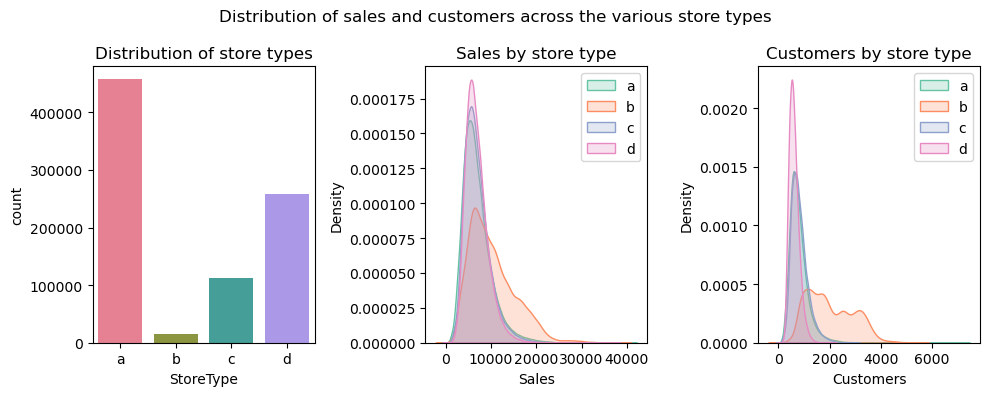

In [4]:
store_types = sales_stores_df['StoreType'].sort_values().unique()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title('Distribution of store types')
sns.countplot(x = sales_stores_df['StoreType'].sort_values(), palette='husl')

plt.subplot(1, 3, 2)
plt.title('Sales by store type')
for store_type in store_types:
    sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['StoreType'] == store_type] , label = store_type, shade = True)
plt.legend(labels = store_types, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('Customers by store type')
for store_type in store_types:
    sns.kdeplot(x = sales_stores_df['Customers'][sales_stores_df['StoreType'] == store_type] , label = store_type, shade = True)
plt.legend(labels = store_types, loc = 'upper right')

plt.suptitle("Distribution of sales and customers across the various store types")
plt.tight_layout();

In [5]:
by_store_type= sales_stores_df.groupby('StoreType')
by_store_type[['Sales', 'Customers']].describe(percentiles=[.5]).transpose()

StoreType                    a             b              c              d
Sales     count  457077.000000  15563.000000  112978.000000  258774.000000
          mean     6925.167661  10231.407505    6932.512755    6822.141881
          std      3277.786381   5157.190155    2897.564578    2556.582881
          min         0.000000      0.000000       0.000000       0.000000
          50%      6285.000000   9130.000000    6407.000000    6395.000000
          max     41551.000000  38722.000000   31448.000000   38037.000000
Customers count  457077.000000  15563.000000  112978.000000  258774.000000
          mean      795.361469   2021.822335     815.465887     606.339876
          std       387.564196    911.031277     329.744701     199.266174
          min         0.000000      0.000000       0.000000       0.000000
          50%       720.000000   1839.000000     756.000000     577.000000
          max      7388.000000   5494.000000    3096.000000    2239.000000

<!-- Filialen der Art `b` haben im Durchschnitt einen größeren Kundenstrom und erzielen höhere Gewinne. Es gibt aber weniger Filialen dieser Art. Geschäfte des Typs d haben das beste Verhältnis zwischen Umsatzvolumen und Kundenzahl. -->

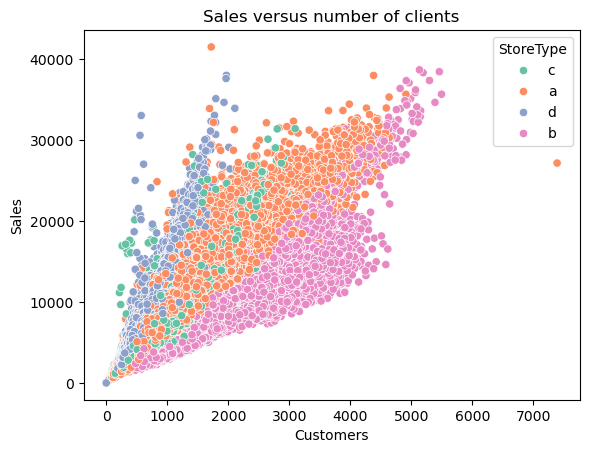

In [6]:
sns.scatterplot(x='Customers', y='Sales', data=sales_stores_df, hue='StoreType').set(title="Sales versus number of clients");

Stores of type `b` have more customers and more sales on average, but there are fewer stores of this type. Stores of type `d` have the best ratio between the number of customers and sales volume.

##### Sortiment

In [7]:
dict_assort = {'a': 'basic', 'b': 'extra','c': 'extended'}
sales_stores_df['Assortment'] = sales_stores_df['Assortment'].apply(lambda x: dict_assort[x])

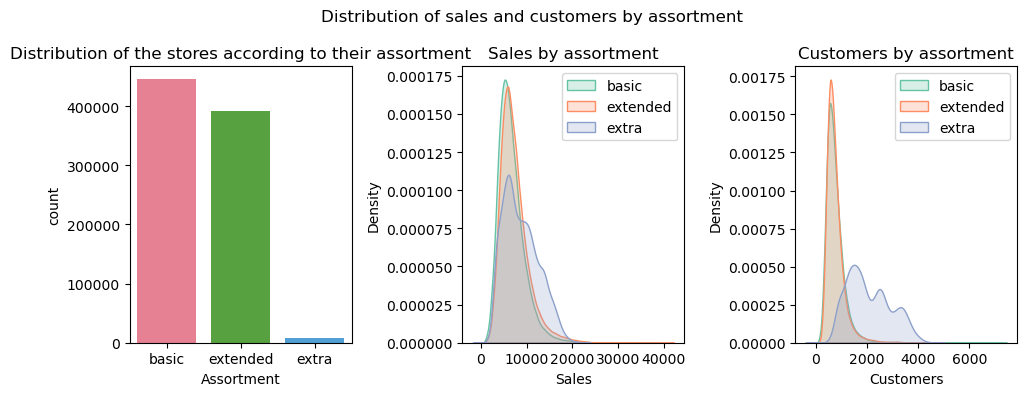

In [8]:
assortments = sales_stores_df['Assortment'].unique()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title('Distribution of the stores according to their assortment')
sns.countplot(x = sales_stores_df['Assortment'], palette='husl')

plt.subplot(1, 3, 2)
plt.title('Sales by assortment')
for assortment in assortments:
    sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Assortment'] == assortment] , label = assortment, shade = True)
plt.legend(labels = assortments, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('Customers by assortment')
for assortment in assortments:
    sns.kdeplot(x = sales_stores_df['Customers'][sales_stores_df['Assortment'] == assortment] , label = assortment, shade = True)
plt.legend(labels = assortments, loc = 'upper right')

plt.suptitle("Distribution of sales and customers by assortment")
plt.tight_layout();

In [9]:
by_assortment = sales_stores_df.groupby('Assortment')
by_assortment[['Sales', 'Customers']].describe(percentiles=[.5]).transpose()

Assortment               basic       extended         extra
Sales     count  444909.000000  391271.000000   8212.000000
          mean     6621.017039    7300.526339   8639.346322
          std      2972.500222    3184.144215   3806.006716
          min         0.000000       0.000000      0.000000
          50%      6082.000000    6675.000000   8081.000000
          max     38722.000000   41551.000000  22137.000000
Customers count  444909.000000  391271.000000   8212.000000
          mean      747.943822     752.169959   2066.795543
          std       371.894840     372.862670    847.438646
          min         0.000000       0.000000      0.000000
          50%       673.000000     672.000000   1894.000000
          max      7388.000000    4911.000000   4645.000000

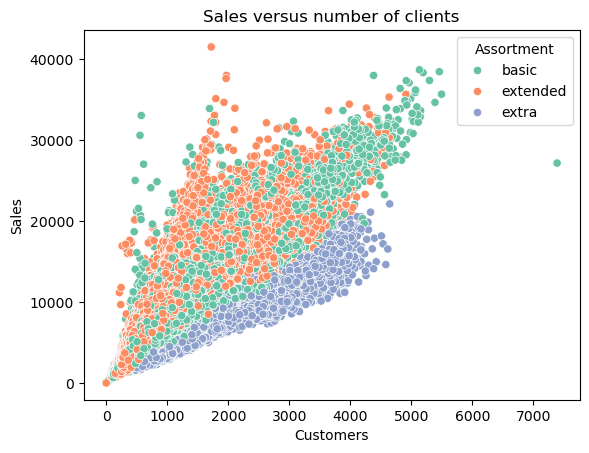

In [10]:
sns.scatterplot(x='Customers', y='Sales', data=sales_stores_df, hue='Assortment').set(title="Sales versus number of clients");

Stores with a type `extra` product range have a larger average customer flow and generate higher profits. However, there are fewer stores with this type of assortment. The `basic` and `extended` ranges have the best ratio between customer numbers and sales.

##### CompetitionDistance

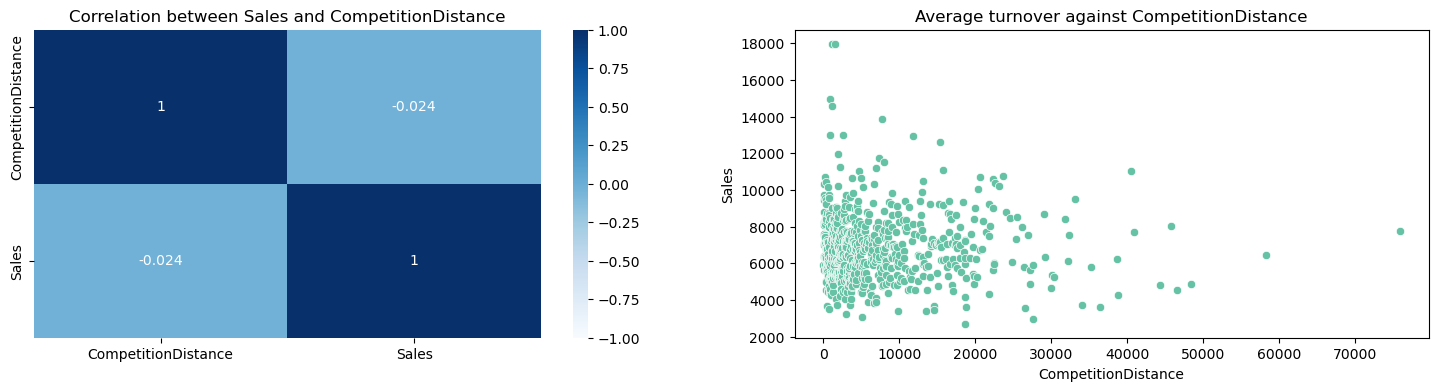

In [11]:
plt.rcParams["figure.figsize"] = (18,4)

comp_dist = sales_stores_df[['CompetitionDistance','Sales']].groupby('CompetitionDistance').mean().reset_index()

plt.subplot(1, 2, 1)
plt.title ("Correlation between Sales and CompetitionDistance")
sns.heatmap(comp_dist[['CompetitionDistance','Sales']].corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Average turnover against CompetitionDistance");
sns.scatterplot(x='CompetitionDistance', y='Sales', data=comp_dist);

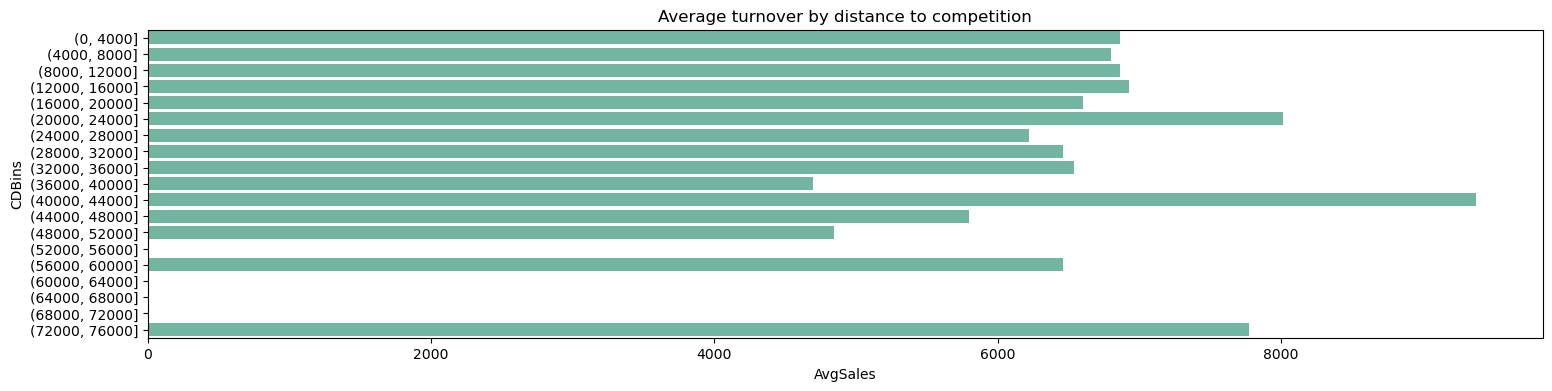

In [12]:
bins = list(np.arange(0,80000, 4000))
comp_dist['CDBins'] = pd.cut(comp_dist['CompetitionDistance'], bins = bins)
comp_dist_avg = comp_dist.groupby('CDBins').agg({'CompetitionDistance':'count', 'Sales': 'sum'}).reset_index()
comp_dist_avg['AvgSales'] = comp_dist_avg['Sales'] / comp_dist_avg['CompetitionDistance']

plt.title ('Average turnover by distance to competition')
sns.barplot(y = 'CDBins', x = 'AvgSales', data = comp_dist_avg);

I don't see a clear relationship here and the correlation also seems to be low.

##### CompetitionOpenSince

We create a variable that measures the competition time in months.

In [13]:
# We suppose that if CompetitionOpenSince has no value is because there's actually no known competition 
# until the moment where the observation was made (CompetitionOpenSince = 0 in this case)
sales_stores_df['CompetitionOpenSince'] = sales_stores_df.apply(lambda x: x['Date'] \
                                                               if pd.isna(x['CompetitionOpenSince']) == True \
                                                               else x['CompetitionOpenSince'], axis = 1
                                                              )


sales_stores_df['CompetitionTimeDays'] = (sales_stores_df['Date'] - sales_stores_df['CompetitionOpenSince']) // np.timedelta64(1, 'D')
average_days_per_month = 365 / 12
sales_stores_df['CompetitionTimeMonths'] = (sales_stores_df['CompetitionTimeDays'] / average_days_per_month).astype(int)

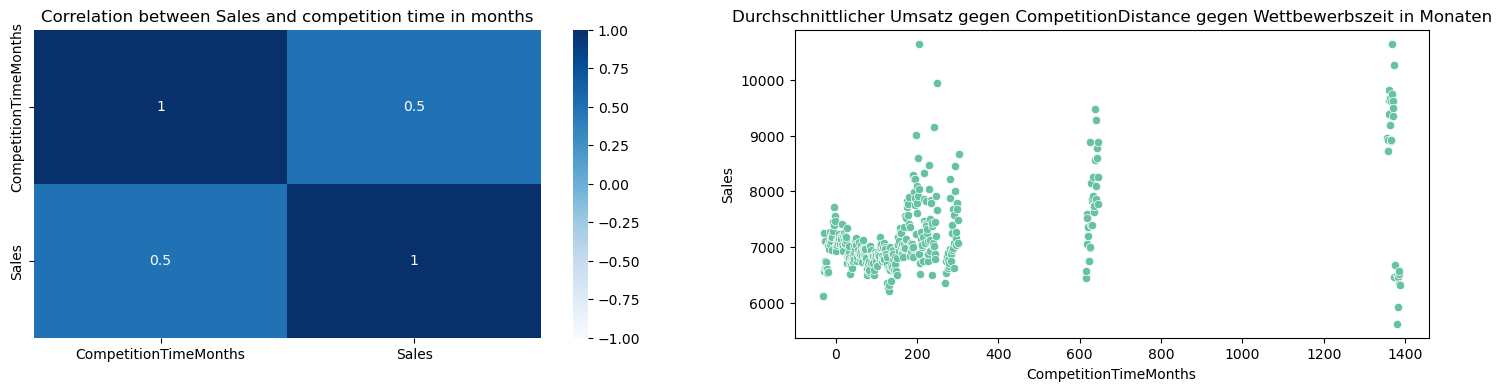

In [14]:
plt.rcParams["figure.figsize"] = (18,4)

comp_time = sales_stores_df[['CompetitionTimeMonths','Sales']].groupby('CompetitionTimeMonths').mean().reset_index()

plt.subplot(1, 2, 1)
plt.title ("Correlation between Sales and competition time in months")
sns.heatmap(comp_time[['CompetitionTimeMonths','Sales']].corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Durchschnittlicher Umsatz gegen CompetitionDistance gegen Wettbewerbszeit in Monaten");
sns.scatterplot(x='CompetitionTimeMonths', y='Sales', data=comp_time);

I cannot see a clear relation between the duration of the competition and the winnings and the fact that several values were missing makes it even more difficult to draw conclusions.

##### Promo2

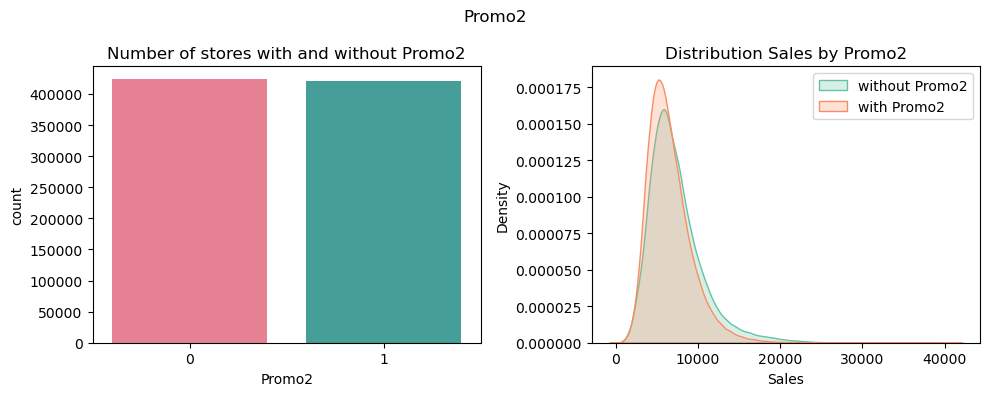

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Number of stores with and without Promo2')
sns.countplot(x = sales_stores_df['Promo2'], palette='husl')

plt.subplot(1, 2, 2)
plt.title('Distribution Sales by Promo2')
sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Promo2'] == 0] , label = "ohne Promo2", shade = True)
sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Promo2'] == 1] , label = "mit Promo2", shade = True)
plt.legend(labels = ['without Promo2','with Promo2'],loc = 'upper right')

plt.suptitle("Promo2")
plt.tight_layout();

In [16]:
by_promo2 = sales_stores_df.groupby('Promo2')
by_promo2['Sales'].describe(percentiles=[.5])

,count,mean,std,min,50%,max
Promo2,,,,,,
0,423307.0,7350.557935,3394.270985,0.0,6685.0,38722.0
1,421085.0,6558.386062,2725.197952,0.0,6075.0,41551.0


On a global level, it is not possible to identify a clear positive impact of Promo2 on sales.  
So far we have seen that Promo2 is restarted every 3 months. Perhaps the Promo2 restart correlates with sales spikes? Let's investigate this:

In [17]:
# Datapoints for stores which participate in Promo2
promo2_df = sales_stores_df[sales_stores_df['Promo2']==1]

months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
promo2_df['MonthMap'] = promo2_df['Date'].dt.month.apply(lambda x: months[x]) 
# Promo2 is starting if it's already active and we are in a month where it starts
promo2_df['Promo2Start'] = promo2_df.apply(lambda x: 1 if 
                                           (x['MonthMap'] in x['PromoInterval'].split(',')) & (x['Date'] >= x['Promo2Since'])
                                           else 0, axis = 1)

The following table shows the descriptive statistics for sales grouped according to whether Promo2 is restarting or not in the corresponding month.

In [18]:
promo2_df.groupby(['Promo2Start'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Promo2Start,,,,,,,,
0,299581.0,6583.694370,2771.434242,0.0,4665.0,6084.0,7945.0,41551.0
1,121504.0,6495.985745,2606.658812,0.0,4671.0,6050.5,7831.0,31523.0


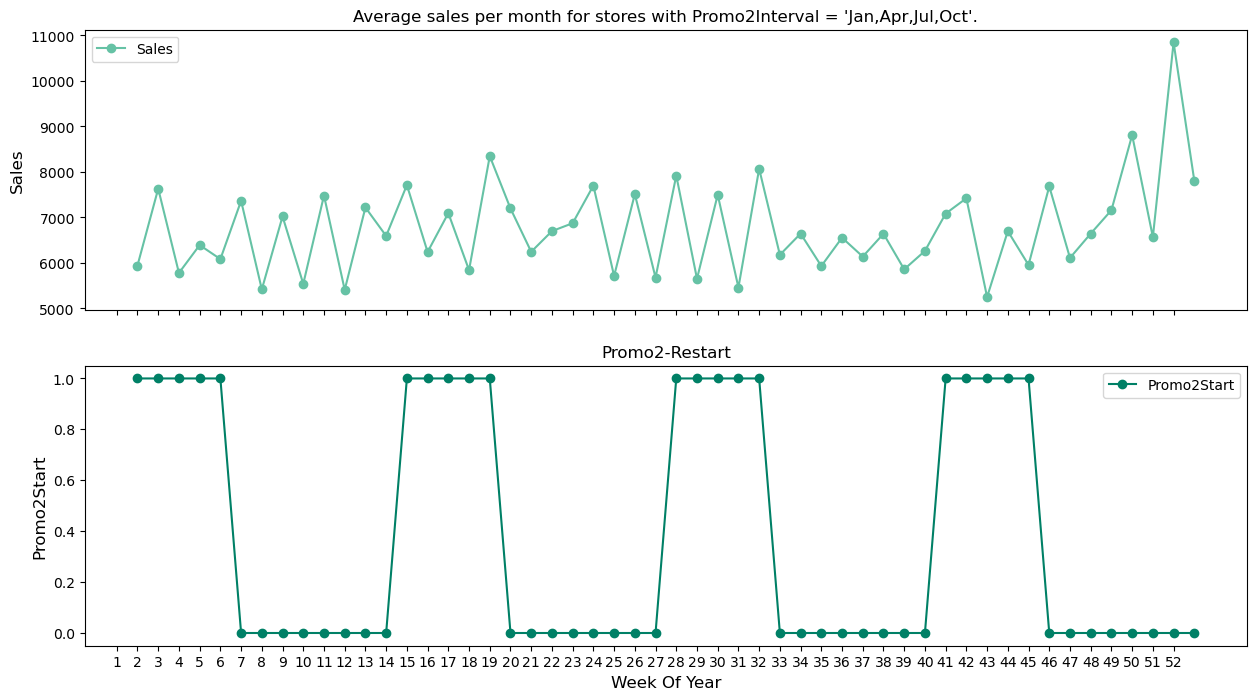

In [19]:
fig, axes = plt.subplots(2,1,sharex=True,figsize=(15,8))

mask = promo2_df['PromoInterval'] == 'Jan,Apr,Jul,Oct'

# Generate monthly time series for sales and customers
promo2_df['WeekOfYear'] = promo2_df['Date'].dt.isocalendar().week
average_sales = promo2_df[mask].groupby('WeekOfYear')['Sales'].mean()
promo2_starts = promo2_df[mask].groupby('WeekOfYear')['Promo2Start'].agg(pd.Series.mode)

# plot these time series
ax1 = average_sales.plot(legend=True, ax=axes[0], marker='o', title="Average sales per month for stores with Promo2Interval = 'Jan,Apr,Jul,Oct'.")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())
ax1.set_ylabel('Sales', size=12)

ax2 = promo2_starts.plot(legend=True, ax=axes[1], marker='o', colormap="summer", title="Promo2-Restart")
ax2.set_ylabel('Promo2Start', size=12)

plt.xlabel('Week Of Year', size=12);

I don't yet see a clear impact of Promo2 on sales Should perhaps stores with longer running promotions sell more?

In [20]:
# PromoTimeWeeks=0 if Promo2 was never activated or if it was activated after the observation
sales_stores_df['PromoTimeWeeks'] = sales_stores_df.apply(lambda x: 0 if (pd.isna(x['Promo2Since']) == True) or \
                                                          (x['Promo2Since'] >= x['Date']) \
                                                          else (x['Date'] - x['Promo2Since']) // np.timedelta64(1, 'W'),\
                                                          axis = 1
                                                         )

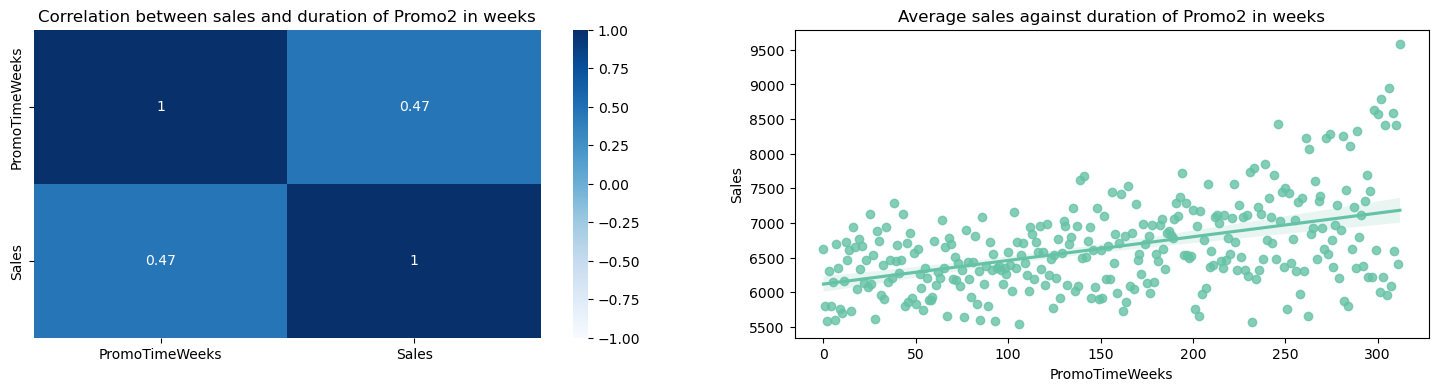

In [21]:
promo2_df = sales_stores_df[sales_stores_df['Promo2']==1]
p2_time = promo2_df[['PromoTimeWeeks','Sales']].groupby('PromoTimeWeeks').mean().reset_index()

plt.rcParams["figure.figsize"] = (18,4)

plt.subplot(1, 2, 1)
plt.title ("Correlation between sales and duration of Promo2 in weeks")
sns.heatmap(p2_time.corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Average sales against duration of Promo2 in weeks")
sns.regplot(x='PromoTimeWeeks', y='Sales', data=p2_time);

Sales seem to increase the longer Promo2 is active, but as we've seen in the first notebook, there is also a general upward trend in the global turnover, so that it is difficult to conclude a cause-effect relation here.

In [22]:
# Save data for later use
sales_stores_df.to_csv("../data/sales_stores.csv", index=False)